# Prosper Loans Exploratory Analysis
## by Josh King

## Preliminary Wrangling

The analyzed dataset is a record of 113,937 data entries from Prosper Loans. The data includes a number of variables regarding each loan (81 variables in total). Due to the large size of the dataset, we will be focusing on a narrowed list of the available variables here. These specific columns will be listed as the data is read from the csv and pulled into a Pandas dataframe; however, generally we will focus on data directly about the borrower, basic loan details (such as the amount), and the amount stood to be made by the bank from the loan.

## Table of Contents
<ul>
<li><a href="#setup">Data Setup</a></li>
<li><a href="#univariate">Univariate Analysis</a></li>
<li><a href="#bivariate">Bivariate Analysis</a></li>
<li><a href="#multivariate">Multivariate Analysis</a></li>
</ul>

<a id='setup'></a>
## Data Setup


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading in the select columns from the data set into a Pandas dataframe
# Not all of these will be used, but I try and bucket out some columns towards my general interest below
# Each row is an arbitrary "type" of data to help list out for my own understanding
selected_col = ['ListingKey', 'MemberKey', 'LoanKey',
                'ListingCreationDate', 'LoanOriginationDate',
                'LoanOriginalAmount', 'Term', 'LoanStatus', 'ListingCategory (numeric)',
                'EstimatedReturn', 'ProsperScore',
                'Occupation', 'EmploymentStatus', 'IncomeRange', 'StatedMonthlyIncome',
                'BorrowerState', 'IsBorrowerHomeowner',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'BorrowerAPR', 'BorrowerRate']

# The "[selected_col]" index appended at the end of the csv read retains the array order in the dataframe
df = pd.read_csv('prosperLoanData.csv',
                 usecols=selected_col, parse_dates=['ListingCreationDate', 'LoanOriginationDate'])[selected_col]
df.head()

,ListingKey,MemberKey,LoanKey,ListingCreationDate,LoanOriginationDate,LoanOriginalAmount,Term,LoanStatus,ListingCategory (numeric),EstimatedReturn,...,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,BorrowerState,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,BorrowerRate
0,1021339766868145413AB3B,1F3E3376408759268057EDA,E33A3400205839220442E84,2007-08-26 19:09:29.263,2007-09-12,9425,36,Completed,0,NaN,...,Other,Self-employed,"$25,000-49,999",3083.333333,CO,True,640.0,659.0,0.16516,0.1580
1,10273602499503308B223C1,1D13370546739025387B2F4,9E3B37071505919926B1D82,2014-02-27 08:28:07.900,2014-03-03,10000,36,Current,2,0.05470,...,Professional,Employed,"$50,000-74,999",6125.000000,CO,False,680.0,699.0,0.12016,0.0920
2,0EE9337825851032864889A,5F7033715035555618FA612,6954337960046817851BCB2,2007-01-05 15:00:47.090,2007-01-17,3001,36,Completed,0,NaN,...,Other,Not available,Not displayed,2083.333333,GA,False,480.0,499.0,0.28269,0.2750
3,0EF5356002482715299901A,9ADE356069835475068C6D2,A0393664465886295619C51,2012-10-22 11:02:35.010,2012-11-01,10000,36,Current,16,0.06000,...,Skilled Labor,Employed,"$25,000-49,999",2875.000000,GA,True,800.0,819.0,0.12528,0.0974
4,0F023589499656230C5E3E2,36CE356043264555721F06C,A180369302188889200689E,2013-09-14 18:38:39.097,2013-09-20,15000,36,Current,2,0.09066,...,Executive,Employed,"$100,000+",9583.333333,MN,True,680.0,699.0,0.24614,0.2085


In [3]:
# Checking for duplicates
df.duplicated().sum()

0

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingKey                   113937 non-null object
MemberKey                    113937 non-null object
LoanKey                      113937 non-null object
ListingCreationDate          113937 non-null datetime64[ns]
LoanOriginationDate          113937 non-null datetime64[ns]
LoanOriginalAmount           113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ListingCategory (numeric)    113937 non-null int64
EstimatedReturn              84853 non-null float64
ProsperScore                 84853 non-null float64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
BorrowerState                108422 non-null object
IsBorrowerHomeowner          113937 non-nul

In [9]:
# ProsperScore is actually a categorical value though, so let's change that
df['ProsperScore'] = df.ProsperScore.astype(str).str.replace("\.0", '')

The above dataframe information looks fairly stable with no duplicate data and datatypes generally falling as expected. Given the project instructions, no further major initial cleaning in expected but will be addressed ad hoc as needed below.

### What is the structure of your dataset?

The imported dataframe consists of information about Prosper loan borrowers, basic information about the loans they took out, information regarding whether Prosper found it likely to collect a return on the loan, and metadata needed to identify each entry. The metadata is denoted by three main keys-- one for the overall listing, one for each unique member, and one for each unique loan.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are:
* Information about each loan borrower
* Basic information about each loan
* Metric's regarding the extent to which Prosper expected a return on the loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The keys may become important if I need to filter down to unique entry types in the dataset. The dates may be needed if I run into any cases of missing data (the Prosper variable definition sheet notes some data is only available after certain years). Most other column types will be useful mainly for exploring relationships regarding how information regarding borrowers correlates with loan types and returns.

## Exploration Setup
There may be a few items I'd like to go ahead and set up for further use in the following sections. Included here are commands that may effect multiple exploration sections and generally deal more with metafactors of preceding code.

In [10]:
# Setting up some colors
base_color = sb.color_palette()[0] # Standard blue
seq_color = 'RdPu' # A sequential palette ranging from pink to purple

##
# Setting up any of the categorical variables as ordinal types as needed
# this method requires pandas v0.21 or later

# IncomeRange
income_order = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999',
                '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_income = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_income)

# ProsperScore
pscore_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
ordered_pscore = pd.api.types.CategoricalDtype(ordered = True, categories = pscore_order)
df['ProsperScore'] = df['ProsperScore'].astype(ordered_pscore)

##

<a id='univariate'></a>
## Univariate Exploration

Below (out of personal interest) I explore the following data distributions:
* Borrower employment/occupation
* Borrower income range
* Expected return
* Prosper score
* Loan amount

Generally my interest here is centered around the borrower types, what Prosper expects to get out of the loans, and how much of a loan is being taken out.

### Borrower Employment Status Distribution
I'll be exploring these through relative frequency bar plots. I could sensibly just use countplots, but I wanted to get in a little practice

In [34]:
# For EmploymentStatus, let's look at the possible values before plotting
np.unique(df.EmploymentStatus.tolist())

array(['Employed', 'Full-time', 'Not available', 'Not employed', 'Other',
       'Part-time', 'Retired', 'Self-employed', 'nan'], dtype='<U13')

In [11]:
# Since there's a lot of overlap in the above entries, let's
# create a new column that pairs down the values some.
# Since "Not available" and "Other" are meaningless, let's replace those with NaN
employ_replace = {'Full-time':'Employed','Not available':np.nan,'Other':np.nan,
                  'Part-time':'Employed','Self-employed':'Employed'}
df['EmploymentStatusMerged'] = df.EmploymentStatus.replace(to_replace=employ_replace)

# And check that it worked below
np.unique(df.EmploymentStatusMerged.tolist())

array(['Employed', 'Not employed', 'Retired', 'nan'], dtype='<U12')

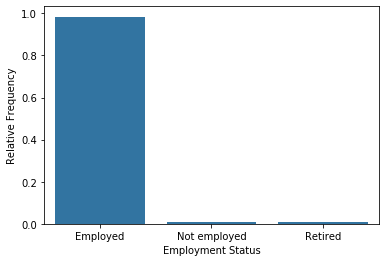

In [12]:
# Now let's create the dataframe for relative frequencies of employment status
df_employmentfreq = df.EmploymentStatusMerged.\
    value_counts(normalize=True).rename_axis('Employment Status').reset_index(name='Relative Frequency')

sb.barplot(data=df_employmentfreq, x='Employment Status', y='Relative Frequency', color=base_color)
plt.show()

The above is interesting but not a particularly useful visualization. Almost overwhelmingly the loans are given to employed individuals. Since that's true, let's cycle back through the above but instead look at those who we know have income (full-time, part-time, retired). Since the "Employed" entry doesn't tell us anything meaningful, we'll exclude those.

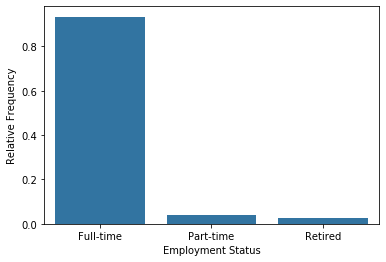

In [13]:
# Recylcing the previous code but to look at different types receiving income instead
receiving_income = ['Full-time', 'Part-time', 'Retired']
df_employmentfreq = df.query('EmploymentStatus in @receiving_income').EmploymentStatus.\
    value_counts(normalize=True).rename_axis('Employment Status').reset_index(name='Relative Frequency')

sb.barplot(data=df_employmentfreq, x='Employment Status', y='Relative Frequency', color=base_color)
plt.show()

Clearly full-time workers are most represented in the dataset has having received loans. While this is unsurprising (these individuals likely being more likely to pay off a loan), it would be worth investigating if unemployed or part-time/retired individuals received a number of the loans.

Since that was kind of borring, let's also look at occupation.

In [71]:
# For Occupation, let's look at the possible values before plotting
np.unique(df.Occupation.tolist())

array(['Accountant/CPA', 'Administrative Assistant', 'Analyst',
       'Architect', 'Attorney', 'Biologist', 'Bus Driver', 'Car Dealer',
       'Chemist', 'Civil Service', 'Clergy', 'Clerical',
       'Computer Programmer', 'Construction', 'Dentist', 'Doctor',
       'Engineer - Chemical', 'Engineer - Electrical',
       'Engineer - Mechanical', 'Executive', 'Fireman',
       'Flight Attendant', 'Food Service', 'Food Service Management',
       'Homemaker', 'Investor', 'Judge', 'Laborer', 'Landscaping',
       'Medical Technician', 'Military Enlisted', 'Military Officer',
       'Nurse (LPN)', 'Nurse (RN)', "Nurse's Aide", 'Other', 'Pharmacist',
       'Pilot - Private/Commercial', 'Police Officer/Correction Officer',
       'Postal Service', 'Principal', 'Professional', 'Professor',
       'Psychologist', 'Realtor', 'Religious', 'Retail Management',
       'Sales - Commission', 'Sales - Retail', 'Scientist',
       'Skilled Labor', 'Social Worker', 'Student - College Freshman',
      

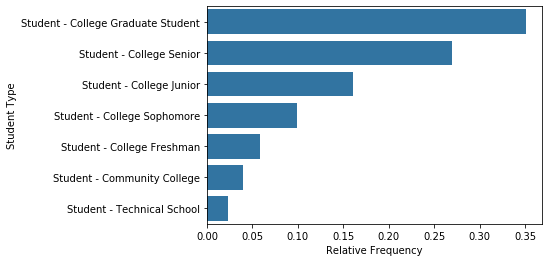

In [14]:
# That's a lot, so let's just look at the students (out of interest)
student_ocps = ['Student - Technical School', 'Student - Community College','Student - College Freshman',
                'Student - College Sophomore', 'Student - College Junior', 'Student - College Senior', 
                'Student - College Graduate Student']
df_studentfreq = df.query('Occupation in @student_ocps').Occupation.value_counts(normalize=True).\
    rename_axis('Student Type').reset_index(name='Relative Frequency')

sb.barplot(data=df_studentfreq, x='Relative Frequency', y='Student Type', color=base_color, order=student_ocps.reverse())
plt.show()

The plot here is quite interesting. For lower cost schooling (community and technical) the relative frequency is low which is not particularly surprising. However, it is interesting that we see a near perfect continuation of increasing representation as students advance through university-level schooling. This likely suggests that each successive year of schooling for a student counts as a different loan listing (rather than the sum total of their loans to be wrapped up in one listing). This needs to be kept in mind if we work with student loan data.

### Borrower Income Range Distribution

In [9]:
# First let's look at the possible values of the income range so we have a sense of the data before plotting
np.unique(df.IncomeRange.tolist())

array(['$0', '$1-24,999', '$100,000+', '$25,000-49,999', '$50,000-74,999',
       '$75,000-99,999', 'Not displayed', 'Not employed'], dtype='<U14')

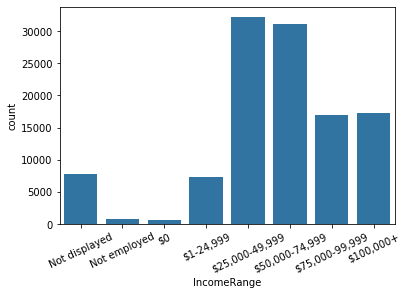

In [15]:
sb.countplot(data=df, x='IncomeRange', color=base_color)
plt.xticks(rotation=25)
plt.show()

While it's unclear what the difference between "not employed" and "$0" is, we can still see from the data that low-to-middle income earners represent the highest number of loans in the dataset. I'm curious as to what the income distribution looks like for those 100K+ earners, so let's use the monthly income column to look at that.

In [16]:
# First I want a column that shows yearly rather than monthly income
# We'll approximate this by multiplying by 12 months
df['YearlyIncome'] = (df.StatedMonthlyIncome * 12)

# Check that it worked with describe
df.YearlyIncome.describe().apply(lambda x: format(x, 'f')) # The lambda function gets rid of the scientific notation

count      113937.000000
mean        67296.306819
std         89741.967302
min             0.000000
25%         38403.999996
50%         56000.000004
75%         81900.000000
max      21000035.000004
Name: YearlyIncome, dtype: object

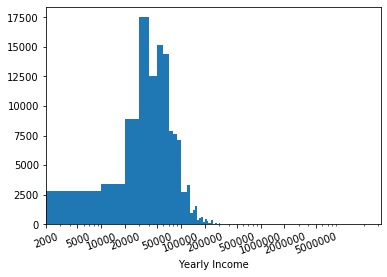

In [17]:
# Let's see what that distribution looks like
# I'll set some arbitrary guesswork to get this in scale

bin_edges = np.arange(0, 22000000, 10000)
plt.hist(data=df, x='YearlyIncome', bins=bin_edges)
plt.xscale('log')
ticks = [2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000]
plt.xticks(ticks, ticks, rotation=20)
plt.xlabel("Yearly Income")
plt.show()

The log transform above did help. For later knowledge, it's good to know that most of the borrower incomes are between around 20K and 100K a year. For a sanity check, this does coincide well with the Income Range bar chart (indeed most are really even less than 100K).

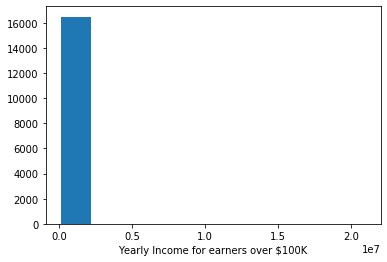

In [20]:
# Now let's look at the distribution for earners over 100K

plt.hist(data=df.query('YearlyIncome >= 100000'), x='YearlyIncome')
plt.xlabel("Yearly Income for earners over $100K")
plt.show()

That auto-calculated plot isn't helpful at all due to the max $ 21 million earner in the set. Let's zoom in to 1 million or less.

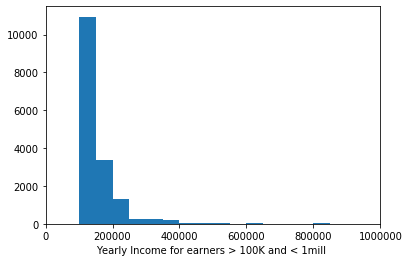

In [23]:
# Plotting distribution of earners greater than 100K but less than 1mill

bin_edges = np.arange(100000, df.YearlyIncome.max()+50000, 50000)
plt.hist(data=df.query('YearlyIncome >= 100000'), x='YearlyIncome', bins=bin_edges)
plt.xlim(0,1000000)
plt.xlabel("Yearly Income for earners > 100K and < 1mill ")
plt.show()

Overall, this is interesting as there are still a number of individuals taking out loans well into the hundreds of thousands (not counting at least some as noted in the millions earlier as well). Overall, we should bear in mind here that we'll have a number of outliers in this pool even after we get past where the loans given reduces to extremely small amounts after $ 200,000.

We'll check a log scale of this below just in case it helps us visualize the larger tail, but it's dubious in this case.

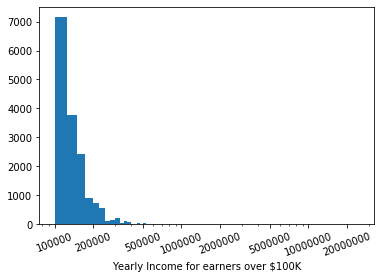

In [24]:
# Log scale plot of the previous trying to include the maximum

bin_edges = np.arange(100000, 25000001, 25000)
plt.hist(data=df.query('YearlyIncome >= 100000'), x='YearlyIncome', bins=bin_edges)
plt.xscale('log')
ticks = [100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000, 20000000]
plt.xticks(ticks, ticks, rotation=20)
plt.xlabel("Yearly Income for earners over $100K")
plt.show()

The log scale plot wasn't particularly helpful. Generally the distribution truly falls off a bit after $ 200,000, and most of the post 100K earners are right around 100K themselves.

Overall since the tail on the calculated yearly income is so long in the full distribution, it's probably worth sticking with the income range for plotting of bivariate and multivariate data.

### Estimated Return Distribution

In [59]:
# First let's look at what the estimated return data looks like to get a sense for plotting
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

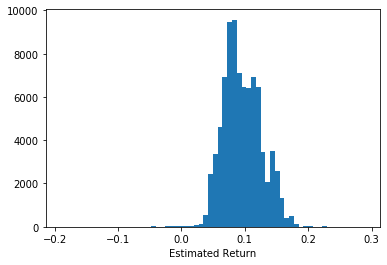

In [25]:
# Trying it first with a relatively small bin size
bin_edges = np.arange(df.EstimatedReturn.min()-.0075, df.EstimatedReturn.max()+.0075, .0075)
plt.hist(data=df, x='EstimatedReturn', bins=bin_edges)
plt.xlabel("Estimated Return")
plt.show()

The estimated return distribution resembles a fairly normal spread, but it's interesting that there are some negative values. Let's zoom in on that.

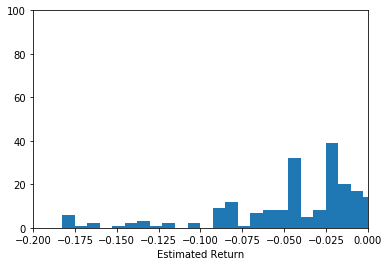

In [26]:
# Looking at the negative area of the expected returns
bin_edges = np.arange(df.EstimatedReturn.min()-.0075, df.EstimatedReturn.max()+.0075, .0075)
plt.hist(data=df, x='EstimatedReturn', bins=bin_edges)
plt.xlim(-0.2, 0)
plt.ylim(0, 100)
plt.xlabel("Estimated Return")
plt.show()

So Prosper does expect to lose a considerable amount on some loans (some with a factor of almost -0.2), but generally this is a very small amount. There's no particularly distribution here, but even of the ones that Prosper expects to lose one, most of this are near 0, so it's not much.

### Prosper Score Distribution

In [242]:
# First let's look at what the estimated return data looks like to get a sense for plotting
np.unique(df.ProsperScore.tolist())

array(['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9', 'nan'],
      dtype='<U32')

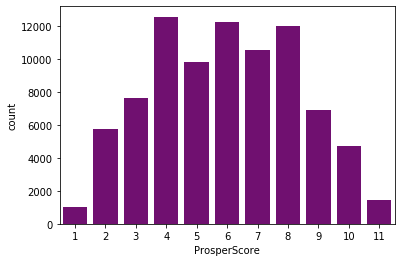

In [12]:
# The above is actually ordinal data so we shouldn't use a histogram, let's countplot instead
# I'll try setting the color param different just for curiosity's sake (interested in whether it takes strings)
sb.countplot(data=df, x='ProsperScore', color='Purple')
plt.show()

This gave us an almost normal distribution with the center near the middle. It's also pretty clean and unsurprising given that the Expected Return (seen above) distribution looks reasonably similar. We might expect the Prosper Score then to be fairly predictive of the Expected Return.

### Loan Amount Distribution

In [19]:
# First let's look at what the loan amount data looks like to get a sense for plotting
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

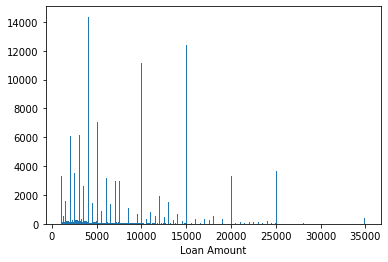

In [27]:
# Trying it first with a relatively small bin size
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+100, 100)
plt.hist(data=df, x='LoanOriginalAmount', bins=bin_edges)
plt.xlabel("Loan Amount")
plt.show()

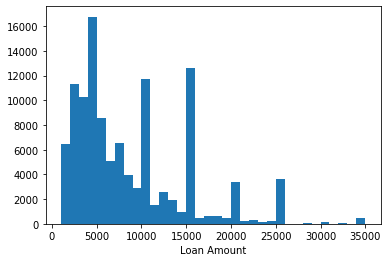

In [28]:
# And now a larger one
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+1000, 1000)
plt.hist(data=df, x='LoanOriginalAmount', bins=bin_edges)
plt.xlabel("Loan Amount")
plt.show()

In both plots, it's pretty apparent that loan amounts bucket out into specific amounts. This suggests that Prosper might have common loan "packages" (standard amounts) offered. Let's zoom into just the 10K or less loans to see if that holds true there as this region seems more continuous on the large bin plot.

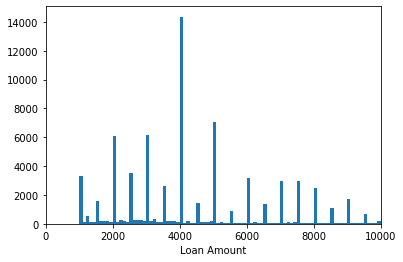

In [29]:
# Zooming in on the 10K or less range

bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+100, 100)
plt.hist(data=df, x='LoanOriginalAmount', bins=bin_edges)
plt.xlabel("Loan Amount")
plt.xlim(0, 10000)
plt.show()

It does indeed look like Prosper is likely offering most (or at least a huge number) of their loans in standard amounts.

### Prompted Questions
I'm combining my response to the following two instructor questions as they both a singificant amount of overlap:
* ***Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?***
* ***Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?***


* Borrower employment/occupation
    * There was a little bit of feature-engineering needed here to look at just the individuals who were employed or receiving income, but overwhelmingly the dataset contains loan info for those who have an income stream of some kind. I then looked at college student loans which showed a distribution skewed to higher university levels. This, to me, suggested that successive entries are listed for each year the student attends university. However, without having a sure sense of how to interpret what exactly the listing for the student loans seen here are, it's hard to advance to higher levels of analysis. It would, for instance, be useful to feel confident in whether these represent the cumulative loans at that stage in the students university experience, or the amount taken out each year. Furthermore, it would be important to know exactly when the loan was taken out. If taken out at the end or beginning of an academic year could skew the interpretation. While such matters might could be determined from the dataset, it would require a deeper dive than is within scope here, and as such I'll likely focus on other variables in further visualization.
* Borrower income range
    * This first was changed to an ordinal type range since it's categorical but has a direction. The income distribution showed most borrowers within the 25K - 75K range. I was interested in the incomes of those higher than 100K however so I created a new column to review this. There were some extreme outliers with incomes in the millions, but the distribution quickly fell off between 100K - 200K. I tried a log transform to review the data here, but the outliers were so large that it was better just to selectively zoom. However a log transform of the calculated yearly income data was helpful to get it all in view.
* Expected return
    * The distrubtion here was similar to that of a normal one with some interesting negative values on the expected return. Zooming in here we see that Prosper does expect to lose out significantly on some loans, but  most of these are outliers and even then closer to 0.
* Prosper score
    *  This distribution was pretty clean and near normal. This matches well with the normal-ish distribution of expected return suggested it might be fairly predictive.
* Loan amount
    * While the distribution here was skewed to the right, the more interesting thing to notice is that many of the loans seem to fall into select buckets. By changing bin size and zooming in some, this appeared true for most of the distribution. My guess from these local maxima is that Prosper likely offers standard loan "packages" (or amounts that people typically borrow).

<a id='bivariate'></a>
## Bivariate Exploration

Here I'm somewhat picking my variables in such that I can get different plot types for practice, but I'll tailor to trails from the univariate analysis.

### Student Type vs Loan Amount

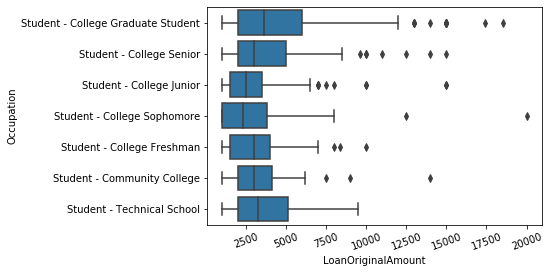

In [14]:
# Since this is a categorical vs a quantitative, we'll do a box plot
# The student_ocps list was defined previously
sb.boxplot(data=df.query('Occupation in @student_ocps'),
           y='Occupation', x='LoanOriginalAmount', order=student_ocps, color=base_color)
plt.xticks(rotation=20)
plt.show()

There are a number of interesting things we can observe from this plot.

One of the first things to notice is that the median college freshman loan amount is higher than that of all but the senior and graduate university students. A conceivable explanation is that students don't know quit how much to take out their first year of college and might take more than needed. This may also explain why the range of loans for sophomores dips lower than the others also as, after taking out a good bit in loans freshman year, they decide they need much less for sophomore.

The general trend afterwards for university students is (by median) that of higher loan amounts as they advance. There are at least a couple of ways this can be interpreted. If the loan amount variable pools in loans taken out in previous years, this just means students have accrued more debt which makes sense. If, however, the loan amount variable is what they took out at that stage of school only, this implies a different more interesting trend. This would instead suggest that students, for whatever reason, are more willing or feel the need to take out steeper amounts each year.

Finally the plot gives some insight into the relative cost of community colleges and technical schools relative to university years. While technical schools can vary a lot, that of a community college is similar to that of a college freshman.

Let's also do a violin plot just to see if it tells us anything else.

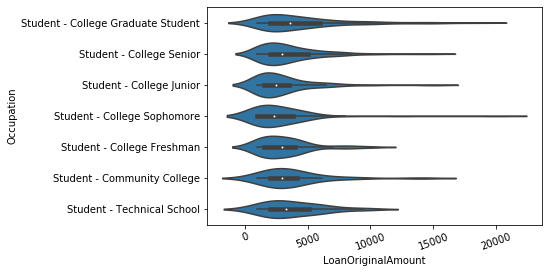

In [15]:
# Violin plot of the above
sb.violinplot(data=df.query('Occupation in @student_ocps'),
           y='Occupation', x='LoanOriginalAmount', order=student_ocps, color=base_color)
plt.xticks(rotation=20)
plt.show()

This doesn't tell us too much different than the box plot, but we do see the faint hint of another peak in the upward tail of the freshman distribution. This does support the possible idea that some students don't have a sense of how much to take out freshman year and might take out more than needed.

Without having a sure sense of how to interpret what exactly the listing for the student loans seen here are, it's hard to advance to higher levels of analysis. It would, for instance, be useful to feel confident in whether these represent the cumulative loans at that stage in the students university experience, or the amount taken out each year. Furthermore, it would be important to know exactly when the loan was taken out. If taken out at the end or beginning of an academic year could skew the interpretation. While such matters might could be determined from the dataset, it would require a deeper dive than is within scope here, and as such I'll likely focus on other variables in further visualization.

### Estimated Return vs Loan Amount

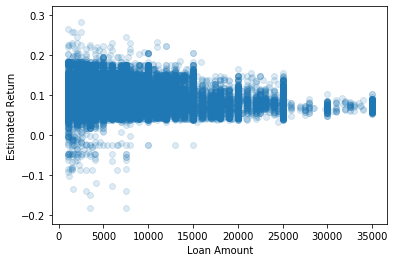

In [30]:
# These are both numerical data, so we'll do a scatter plot
# To deal with overplotting giving the dataset size, we'll sample down some and use the alpha value
plt.scatter(data=df.sample(75000), x='LoanOriginalAmount', y='EstimatedReturn', alpha=.15)
plt.xlabel("Loan Amount")
plt.ylabel("Estimated Return")
plt.show()

Let's sample this down just a little further before we look at it.

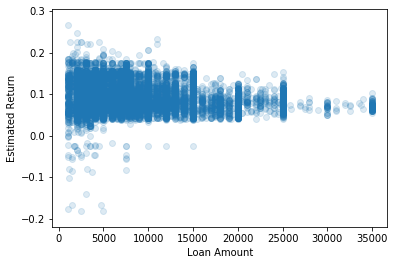

In [31]:
# Sampling down further to 25000
plt.scatter(data=df.sample(25000), x='LoanOriginalAmount', y='EstimatedReturn', alpha=.15)
plt.xlabel("Loan Amount")
plt.ylabel("Estimated Return")
plt.show()

We can see a couple of cool things from this. First, we can see how data stacks up a certain loan amounts. From our univariate analysis, this is expected, and my interpretation was that Prosper is likely offering standard loan amounts. The estimated returns are different for each though as they are given to different borrowers. Second, the distribution of estimated return is interesting. For more expensive loans, the spread tends to thin out, suggesting that either higher-end loans are for some reason more predictable or that Prosper is more stringent in lending. The spread is more broad to lower ends with negative returns more found at lower loan amounts. This is sensible as they would be less risky for Prosper. Interestingly, Prosper expects to see higher relative returns on the lower to mid-level loans though. Since this is relative though, Prosper might still be making more or as much money (as a percentage) on the high-end ones.

Let's see what this looks like in a heatmap, especially given the overplotting we notice.

In [25]:
# I need to look at the min/max values to get a sense of bin edges
print("Loan Amount")
print(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max())
print("Estimated Return")
print(df.EstimatedReturn.min(), df.EstimatedReturn.max())

Loan Amount
1000 35000
Estimated Return
-0.1827 0.2837


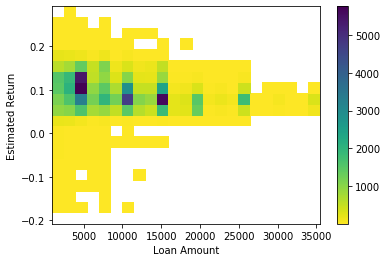

In [32]:
# The histogram function doesn't play well with NaN's so we drop them in the plot
bins_x = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+1500, 1500)
bins_y = np.arange(df.EstimatedReturn.min()-.025, df.EstimatedReturn.max()+.025, .025)
#The cmin parameter below means only plot cells with at least that many in the bin (so no zero count plots)
plt.hist2d(data=df.dropna(), x='LoanOriginalAmount', y='EstimatedReturn',
           bins=[bins_x,bins_y], cmap='viridis_r', cmin=0.5)
plt.xlabel("Loan Amount")
plt.ylabel("Estimated Return")
plt.colorbar()
plt.show()

This is actually more helpful than the scatterplot in this case in terms of seeing the distribution. Most of Prosper's loans seem to be in the ~ 5K or ~ $10K-15K range with three major peaks. The bulk of the loans have an estimated positive return, but it tends to be around a factor of 0.1.

### Prosper Score (and Estimated Return) vs Borrower Income

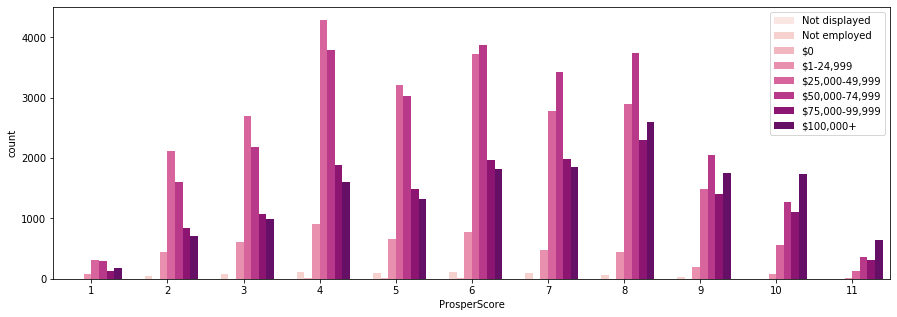

In [41]:
# This is categorical vs categorical (all ordinal) so we'll do a clustered bar chart
# The order is already built in to the datatype here
plt.figure(figsize=[15,5])
sb.countplot(data=df, x='ProsperScore', hue='IncomeRange', palette=seq_color)
plt.legend(loc='upper right')
plt.show()

Unfortunately the "Not displayed" value is baked into this from the ordinal data type (we can manually set it differently in a clean version), but we can see a number of things here. First, we notice a normal-ish distribution just like from the univariate plots. However, as we gravitate towards high Prosper scores, we see the higher income ranges begin to take large parts of the relative distributions. This lines up with a reasonable expectation that higher income ranges would be more secure and rate a higher Prosper Score. Interestingly though, there are still at least some unemployed individuals at mid-high Prosper Scores (albeit a small amount and they fall off quickly after that).

Let's look at estimated returns now to see if we get a similar pattern. I expect that we will.

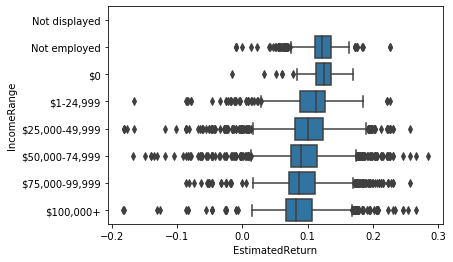

In [44]:
# Now swapping out Prosper Score with Estimated Return
# The new value is numerical so let's do a box plot instead
sb.boxplot(data=df, y='IncomeRange', x='EstimatedReturn', color=base_color)
plt.show()

Surprisingly, this was opposite of the expectation! As income range increases, both the median and interquartile range spread decrease in estimated return. This observed effect may be similar to what we saw with loan amounts. Since the value is a ratio rather than absolute value, the loans on these high-income borrowers may still be secure but not necessarily have as high of an interest rate. Also interesting is that the median estimated returns on the unemployed and $ 0 earners are higher. This could match the plot against loan amount where lower value loans (more likely of those with lower incomes) tended to yield higher returns (perhaps higher interest rates).

Just out of curosity, I'd like to verify if the borrower rates do match the hypothesis above.

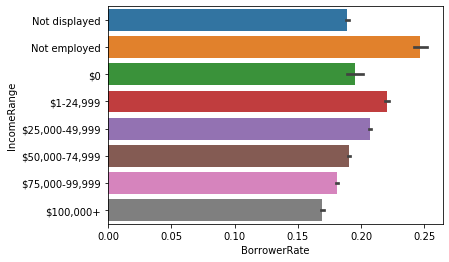

In [130]:
# Borrower rate compared to Income Range
sb.barplot(data=df, y='IncomeRange', x='BorrowerRate')
plt.show()

My hunch was true, Borrower Rate does seem to decrease with increasing income rate (for those with income) at least tentatively supporting the above idea

### Prompted Questions
Again here it makes more sense to me to consolidate my answers based on the plots used and summarize the findings. The prompts here seem to assume a clear divide between features of interest and "other features" which isn't precise given the free and dynamic exploration allowed here. I generally was able to find good routes for analysis sticking with the intended variables but will note if otherwise below.

* ***Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?***
* ***Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?***

* Student Type vs Loan Amount
    * I stuck with just the key features here. Both a violin and a box plot here showed some interesting results. The median loan amount for freshman students starts off a littler higher than sophomore students, with the loan amount then increasing up through university years. One possible explanation for the freshman bump was that perhaps freshman don't have a sense of how much they need yet and so take out more than they might otherwise. It was hard to tell whether the increase through college was do to the listings pooling cumulatively what the students owed or if the students really were taking out more at each stage. Figuring this out would require discussing the data with someone knowledgeable or doing a deep-dive using the key variables and loan dates. As such I decided I'd like stick with the other variables in further analysis. The plots though were helpful in seeing the comparison to community college and technical schools (about the same loan amount as that of a college freshman).
* Estimated Return vs Loan Amount
    * Just stuck with my intended variables but I had to plot a few times to get a clear pictures. This was great and helping see which kinds of loans were expected to yield more returns. After a couple of scatter plots we could see that the data was pretty continuously distributed with loan amounts having many different estimated returns, but two trends clearly stuck out: 1) high estimated returns trail off at high loan amounts, and 2) nearly all of the negative returns were at lower (< $10K) loan amounts. After running the same plot as a histogram we were able to see that the peak distributions of loans were at an expected return of about 0.1 spread all across the loan amount range.
* Prosper Score (and Estimated Return) vs Borrower Income
    * We had to do a number of plots to review the data here and see if there was a trend related to income and how positive Prosper viewed the loan. A clustered bar plot of Prosper score and income range showed a bias in higher income brackets to high incomes (expected with a higher income likely being a more stable loan). When I plotted the income range against the expected return however I was surprised to see the median expected return trended lower (if albeit slightly) at higher income ranges. This was hard to explain so I did look into a feature I hadn't expected of Borrower Rate to gain some insight. Plotting this vs income range I saw that higher income ranges had lower borrowing rates. My intuition then is that high income range borrowers are more stable and thus get a higher Prosper score, but the borrower rate tends to be low, and as such the expected return can shrink a little even with increasing Prosper score.

<a id='multivariate'></a>
## Multivariate Exploration
Here I'm still biasing my efforts as such that I get practice working with a variety of different plot types. From what I've learned in previous levels of analysis though, I thought it would be good to focus on loans (by amount and income) that Prosper expected to be positive (via Prosper score and estimated return).

### Estimated Return vs Loan Amount vs Borrower Rate

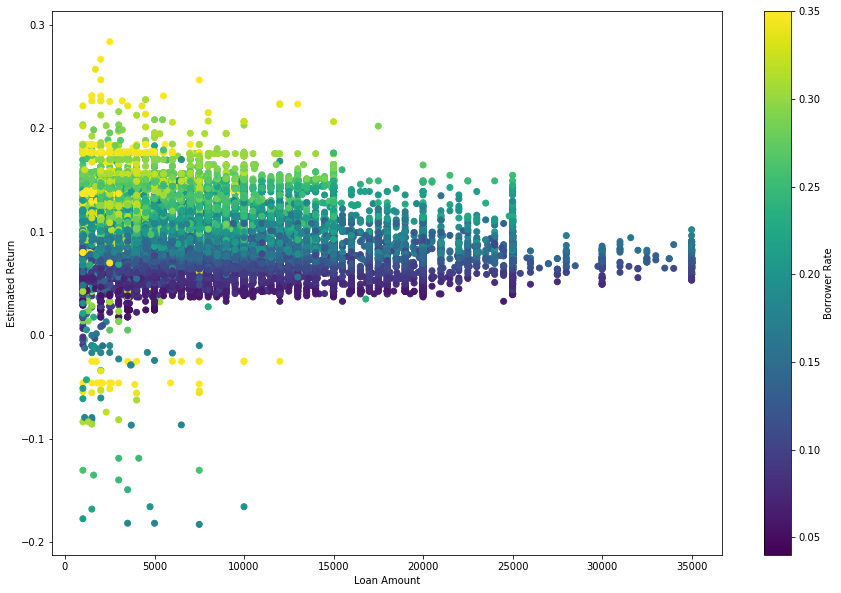

In [33]:
# Here we have 3 quantiative, so let's do a scatter plot encoding the 3rd variable with color
# We'll need to sample it down & graph pretty large some given the data size to deal with overplotting
plt.figure(figsize=[15,10])
plt.scatter(data=df.sample(50000), x='LoanOriginalAmount', y='EstimatedReturn', c='BorrowerRate', cmap='viridis')
plt.xlabel("Loan Amount")
plt.ylabel("Estimated Return")
plt.colorbar(label="Borrower Rate")
plt.show()

This confirmed much of my intuitions previously. My suspcision was that higher loans amounts will have lower estimated returns due in correlation with a lower borrower rate, which is confirmed here. Conversely, the higher estimated returns also have higher borrower rates and are clustered more in the lower loan amounts. Interestingly some of the high borrower rates make up a decent chunk of the few loans with a negative return.

### Estimated Return vs Loan Amount vs Income Range

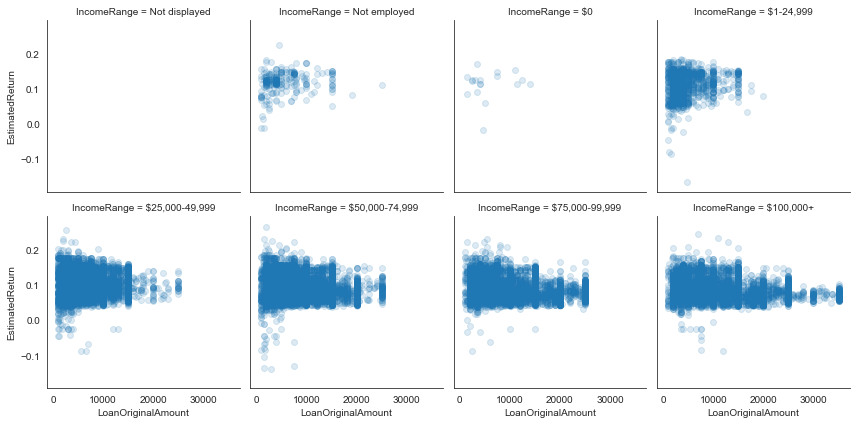

In [168]:
# We have two numerical values and on categorical (ordinal), so let's facet the data as a scatter
# While we could try to encode income range as shape on a scatter, we'd run into overplotting and not be able to see much
# We'll sample down again to help with overplotting
grid = sb.FacetGrid(data=df.sample(50000), col='IncomeRange', col_wrap=4, margin_titles=True)
grid.map(plt.scatter, 'LoanOriginalAmount', 'EstimatedReturn', alpha=.15)
plt.show()

This plot marches in step with the previous findings. As income range increases, borrowers access higher and higher loan amounts. At all income ranges, the estimated return trails off with higher loan amount. There is, however, not a clearly evident pattern regarding a correlation betweeen estimated return and income range that can't be explained by the loan amount here. We do seem to see a higher number of negative returns in the \\$50K - $75K range, but this could potentially be an artifact of sampling.

Because of overplotting though, this doesn't tell us too much about the distribution of loans for each plot. To address that, let's do a facetted histogram below.

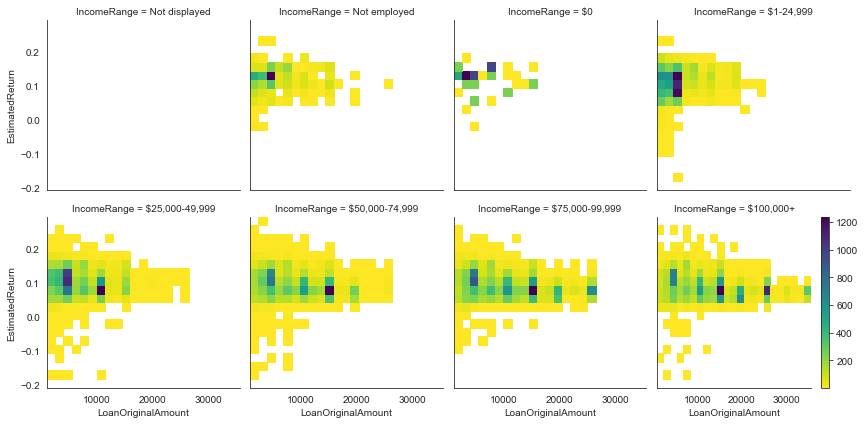

In [170]:
# The above plot converted to a facetted histogram
grid = sb.FacetGrid(data=df.dropna(), col='IncomeRange', col_wrap=4, margin_titles=True)
bins_x = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+1500, 1500)
bins_y = np.arange(df.EstimatedReturn.min()-.025, df.EstimatedReturn.max()+.025, .025)
# Seaborn autoplots this with gridlines so I set "linewidths=0" to hide those
grid.map(plt.hist2d, 'LoanOriginalAmount', 'EstimatedReturn', 
         bins=[bins_x,bins_y], cmap='viridis_r', cmin=0.5, linewidths=0)
plt.colorbar()
plt.show()

The distribution seen here mostly just confirms previous findings. The peak points within the distribution are indicated of the standard loan amounts found through univariate analysis generally seen around an estimated return of 0.1 as found in bivariate analysis. However, now with overplotting and sampling down no longer an issue, it does seem that higher income ranges might have a slightly less likelihood of having a negative estimated return on their loans.

### Estimated Return vs Loan Amount vs Prosper Score

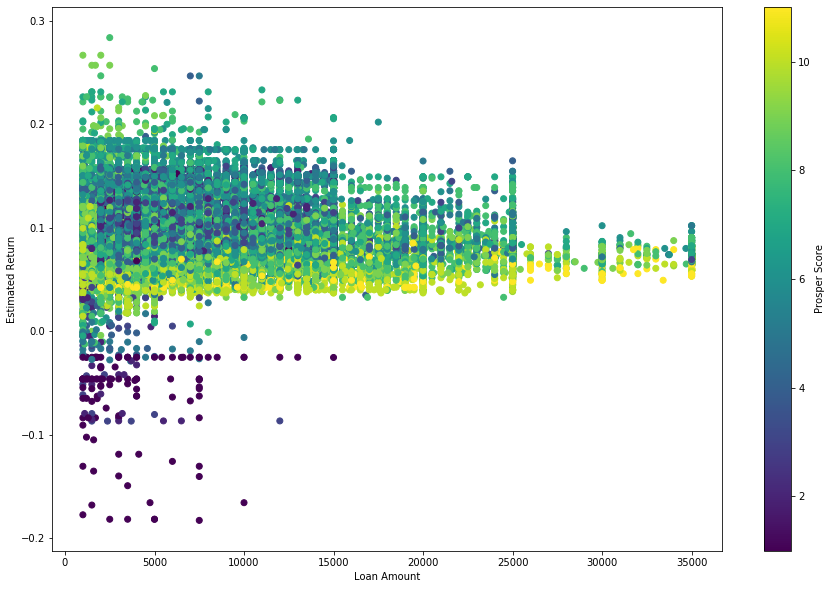

In [35]:
# We have two numerical and one categorical (ordinal) variables here so a facetted plot would make sense BUT
# I wanted to see all of the data on one plot and ProsperScore doesn't behave to terribly as a quantitative value here.
# While this may not be technically correct, it works well in this unique instance.
plt.figure(figsize=[15,10])
plt.scatter(data=df, x='LoanOriginalAmount', y='EstimatedReturn', c='ProsperScore', cmap='viridis')
plt.xlabel("Loan Amount")
plt.ylabel("Estimated Return")
plt.colorbar(label="Prosper Score")
plt.show()

We see a slight disjunction between estimated return and Prosper score here. Higher estimated returns do not necessarily mean higher Prosper scores (as also seen in previous analysis). Rather there is a definite range across all loan amounts where most of the highest rank Prosper scores fall in of about ~0.05 estimated return. Another way of saying this is that the "safest" loans are more likely ones that Prosper only expects a modest return on. The rest of the data is distributed without much of a clear relationship we haven't otherwise seen except that of low Prosper scores. Here we can see that a low Prosper score does clearly predict nearly all negative returns, and that these are the lower end of loan amounts.

### Estimated Return vs Prosper Score vs Income Range

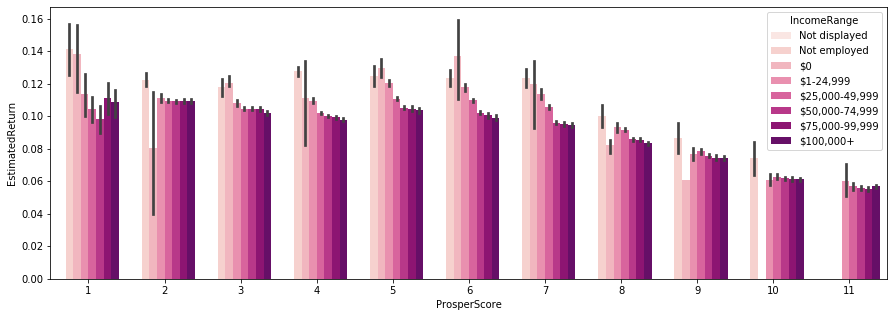

In [144]:
# We have one numerical and two categorical (ordinal) variables, so let's try a clustered bar chart
plt.figure(figsize=[15,5])
sb.barplot(data = df, x ='ProsperScore', y = 'EstimatedReturn', hue ='IncomeRange', palette=seq_color)
plt.show()

We see the same disjoint between estimated return and Prosper score here. As the Prosper Score increases, the mean estimated return begins to decrease (generally across all income ranges). From the cumulative previous analysis, we can suggest that this strange pattern is explained by Prosper score likely more reflecting the security of the loan, with the most secure loans being those with only a modest expected return due to a low borrower rate. When reviewing the relationship to income range though, we notice that lower income ranges, including the $0 and unemployed are still represented across many of the scores and ofen even yield a higher estimated return. This is likely due to a higher borrowing rate (seen from previous analysis). The no income brackets immediately fall off at the tail of Prosper Scores however.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Many of the plots in the multivariate analysis very much felt like they built upon previous intuitions and conclusions. Overall I noticed a trend that higher loan amounts didn't necesarily mean a higher estimated return. From bivariate analysis, we noticed this may be due to different borrower rates. This relationship became vary clear when plotting all values together, where we noticed that the highest returns were small loans with high borrower rates attached. This was reinfornced when looking at other variables such as income range and seeing that estimated return was still better explained by the loan amount and likely connections to borrower rate.

### Were there any interesting or surprising interactions between features?

From bivariate analysis there was already an expected disconnect between Prosper score and estimated return, but this became very evident when plotting here. Across all loan amounts there was a line of very high Prosper scores where the estimated return was only modest. As noted in the plot comments, this is likely explained by Prosper score evaluating more the security of the loan while estimated return is correlated with borrower rate.